# Final Report

### BA545: Online Shoppers Purchasing Intentions
### Spring 2020
 
By: Faris Alenezy, Andre Loukrezis & Elise Vincent

---

## **PROJECT GOAL:** What factors are important in predicting whether an online shopper decides to purchase a product? 

In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
plt.style.use('fivethirtyeight')

pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex


In [2]:
#reading the dataset
df = pd.read_csv('./data/online_shoppers_intention.csv')


---

## Data Dictionary 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-wa1i{font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-yla0{font-weight:bold;text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 841px">
<colgroup>
<col style="width: 161px">
<col style="width: 541px">
<col style="width: 139px">
</colgroup>
  <tr>
    <th class="tg-wa1i">Feature name</th>
    <th class="tg-wa1i"> Feature description</th>
    <th class="tg-wa1i">Data Type</th>
  </tr>
  <tr>
    <td class="tg-cly1">Administrative</td>
    <td class="tg-cly1">Number of pages visited by the visitor about account management</td>
    <td class="tg-yla0">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-cly1">Administrative duration</td>
    <td class="tg-cly1">Total amount of time (in seconds) spent by the visitor on account management related pages</td>
    <td class="tg-yla0">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Informational</td>
    <td class="tg-0lax">Number of pages visited by the visitor about Web site, communication and address information of the shopping site</td>
    <td class="tg-1wig">Continuous/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Informational duration</td>
    <td class="tg-0lax">Total amount of time (in seconds) spent by the visitor on informational pages</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Product related </td>
    <td class="tg-0lax">Number of pages visited by visitor about product related pages </td>
    <td class="tg-1wig">Continuous/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Product related duration</td>
    <td class="tg-0lax">Total amount of time (in seconds) spent by the visitor on product related pages</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Bounce rate</td>
    <td class="tg-0lax"> Average bounce rate value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Exit rate</td>
    <td class="tg-0lax"> Average exit rate value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Page value</td>
    <td class="tg-0lax"> Average page value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Special day </td>
    <td class="tg-0lax">Closeness of the site visiting time to a special day</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">OperatingSystems </td>
    <td class="tg-0lax">Operating system of the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Browser</td>
    <td class="tg-0lax"> Browser of the visitor</td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Region </td>
    <td class="tg-0lax">Geographic region from which the session has been started by the visitor </td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">TrafficType</td>
    <td class="tg-0lax"> Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)</td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">VisitorType</td>
    <td class="tg-0lax"> Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’ </td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Weekend</td>
    <td class="tg-0lax"> Boolean value indicating whether the date of the visit is weekend</td>
    <td class="tg-1wig">Binary/Boolean</td>
  </tr>
  <tr>
    <td class="tg-0lax">Month </td>
    <td class="tg-0lax">Month value of the visit date</td>
    <td class="tg-1wig">Date/Text</td>
  </tr>
  <tr>
    <td class="tg-0lax">Revenue</td>
    <td class="tg-0lax"> Class label indicating whether the visit has been finalized with a transaction</td>
    <td class="tg-1wig">Binary/Boolean</td>
  </tr>
</table>

Sakar, Cemal Okan et al. “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks.” Neural Computing and Applications 31 (2018): 6893-6908.

----

# Exploratory Data Analysis

In [5]:
#Checking For data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
display(Markdown("**The number of columns in the dataset is: {}**".format(df.shape[1])))

display(Markdown("**The number of rows in the dataset is: {}**".format(df.shape[0])))


**The number of columns in the dataset is: 18**

**The number of rows in the dataset is: 12330**

### Checking For Missing Values

In [5]:
display(Markdown("**The number of missing values in the dataset is: {}**".format(df.isna().sum().sum())))


**The number of missing values in the dataset is: 0**

---

# Making Sense of the Data

Early understanding of the data is critical in regards to model interpretation. The original dataset contained 18 columns and 12330 rows. The target variable, "Revenue" was heavily skewed, with only 15.5% of web users making a purchase during that visit. 

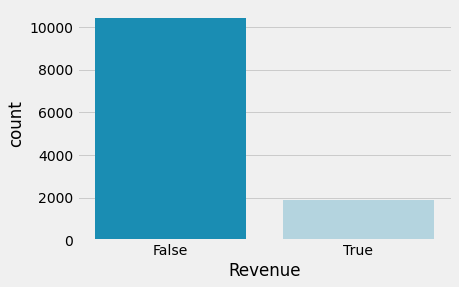

In [6]:

sns.countplot(df['Revenue'] , palette = palette_list)

plt.show()

After observing the target variable, we dove into specific variables to observe how the distribution of each may affect our models.
For instance, the website was visited far more frequently during the week (M-F) and by returning visitors. It was also noteable that "region 1" was by far the most popular location for visitors.

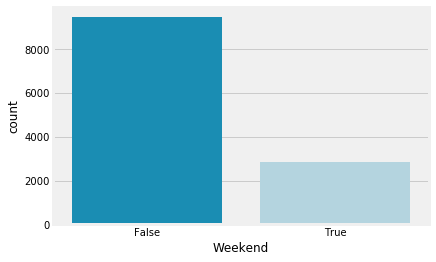

In [7]:
sns.countplot(df['Weekend'], palette = palette_list)
plt.show()

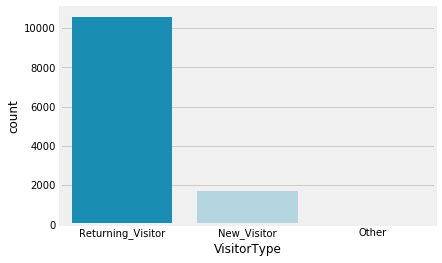

In [8]:
sns.countplot(df['VisitorType'],palette = palette_list)
plt.show()

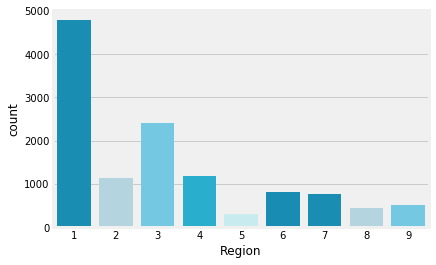

In [9]:
sns.countplot(df['Region'],palette =palette_list)
plt.show()

We then decided to run crosstab visualizations to see how certain variables compared to the target value.

It was determined that most of the website's purchases (as well as non-purchasing visits) occured in November, followed closely by May and March. This was interpreted as sales revolving around holiday times. This idea is plausable due to the high non-purchase rate in December, which could be caused by customers visiting the site to browse for gifts, but not making a purchase. Similarly, the website's highest reported Bounce and ExitRates also occured within those three months.

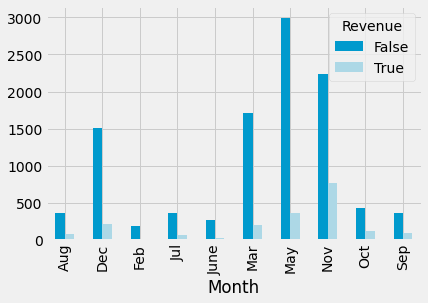

In [34]:
#sns.set()

fig = pd.crosstab(df['Month'],df['Revenue']).plot.bar(color=palette_list )

plt.show()

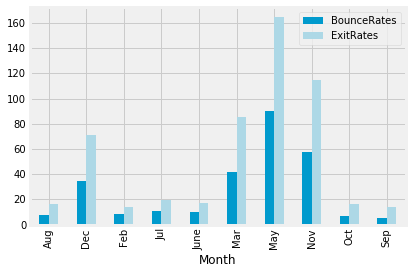

In [11]:
df.groupby(['Month'])['BounceRates','ExitRates'].sum().plot(kind ="bar",color=palette_list)
plt.show()

We also noted that returning_visitors had the highest rate of non-purchases out of all the visitors. This could be explained by returning customers checking the site periodically to check for sales or specific prices. While new visitors also had a higher rate of non-purchasing, it could be inferred that as a new customer, they were referred to or sought out the website to find a specific product, not to casually browse for deals.

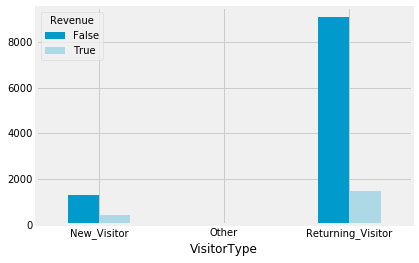

In [12]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot.bar(color=palette_list, rot= 0)
plt.show()

After observing the high occurance of region_1, we decided to see if this website's revenue also heavily flowed from the same region. However, while region_1 is more profitable than the others, it also supported the highest rate of non-purchasing visits, approximately double the amount as the second most popular region, region_3. We observed a similar pattern when grouping by Bounce and Exit Rates, with region_1 leading in both accounts.

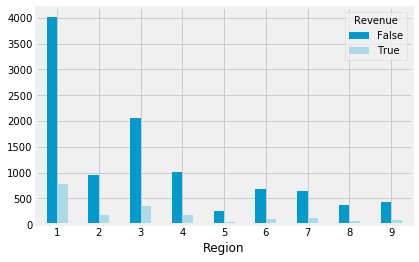

In [13]:
pd.crosstab(df['Region'],df['Revenue']).plot.bar(color=palette_list, rot = 0)
plt.show()

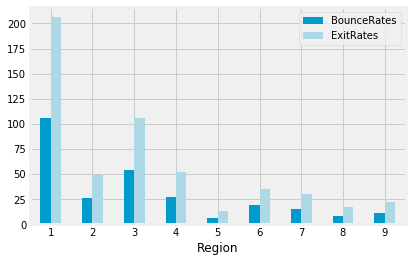

In [14]:
sns.color_palette("Set2")
df.groupby(['Region'])['BounceRates','ExitRates'].sum().plot(kind = "bar",color=palette_list ,rot = 0)
plt.show()

Finally, we wanted to measure Bounce and ExitRates against our target feature. It appears that even visitors that make a purchase on the site experience a moderate ExitRate. This could be attributed to the 

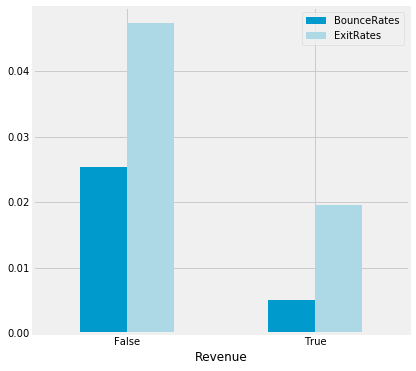

In [15]:
(df.groupby(["Revenue"])['BounceRates','ExitRates'].agg('mean')).plot.bar(figsize = (6,6),color=palette_list,rot = 0)
plt.show()

----

# Correlation

We performed a correlation matrix to see which features had a high correlation with the target, as well as the other features. This will help us in any necessary feature engineering.

### List of correlation pair (Max on top):

,,
BounceRates,ExitRates,0.913004
ProductRelated,ProductRelated_Duration,0.860927
Informational,Informational_Duration,0.618955
Administrative,Administrative_Duration,0.601583


--------

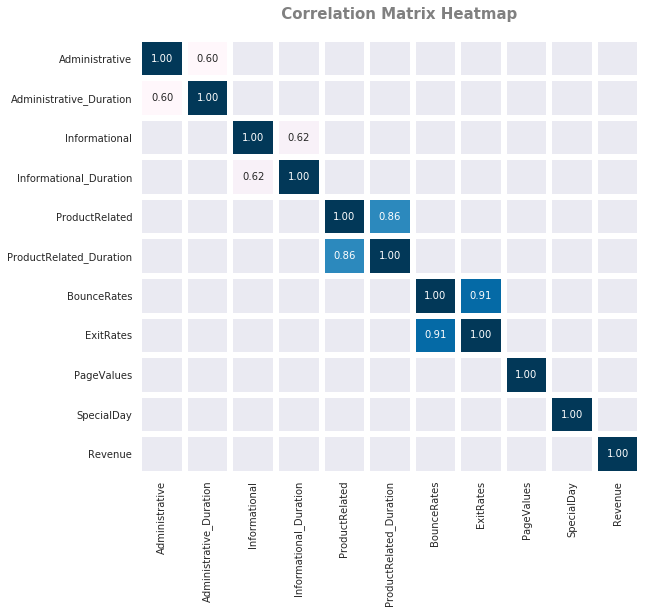

In [93]:
corr_cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
            'Revenue',
           
 ]


# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#correlation matrix
corr_matrix = df[corr_cols].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
## prints a descending list of correlation pair (Max on top)
display(Markdown("### List of correlation pair (Max on top):"))
display(corr_list[corr_list>= .5].to_frame(""))
display(Markdown("--------"))
display(Markdown(" "))


corr_df =df[corr_cols].corr().abs()
corr_df = corr_df[corr_df >= .5]           
plt.figure(figsize= (8,8))
corr = corr_df#.round(4)
sns.heatmap(corr, annot=True,cmap = "PuBu"  ,fmt=".2f",
                annot_kws={'size':10},lw = 5,
                cbar=False)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
#plt.title("Correlation Matrix HeatMap")
plt.text(3,-.5, " Correlation Matrix Heatmap", fontsize = 15, color='gray', fontweight='bold')
#plt.style.use('seaborn')
plt.show()





__Based on our correlation matrix, we determined the pairwise of four pairs that required feature engineering. Those pairs have been highlighted in the above matrix:__

- Administrative & Administrative_Duration
- Informational & Informational_Duration
- ProductRelated & ProductRelated_Duration
- BounceRates & ExitRates

---

# Feature Engineering

We then took these pairwise and found the average page duration per second for Administrative, Information and ProductRelated, and the ratio between BounceRates and ExitRates. We felt that using these new features could serve better use in future feature selection processes and eliminate redundant correlating features in our modeling. [__Ref Notebook__](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/DataPreprocessing.ipynb)

| Variables | Formula|
|--|--|
| Administrative & Administrative_Duration| Administrative_Duration/Administrative |
| Informational & Informational_Duration | Informational_Duration/Informational |
| ProductRelated & ProductRelated_Duration | ProductRelated_Duration/ ProductRelated  |
| BounceRates & ExitRates | (BounceRates +ExitRates)/2 |

---


### Encoding

We changed text based features into numeric and/or binary data points such as month to season and used pandas dummies for the rest of categorical features [__Ref Notebook__](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/DataPreprocessing.ipynb)

---

# Determining How to Handle Outliers

Before determing what to do with outliers, we decided to look at a few scatter plots of data to get an idea of the data in relation to PageValues, the driving force leading to revenue. The scatter plots are colored based on if the data point resulted in revenue or not. These two visualizations are two we selected for the purpose of showing two examples, if you would like to referance any more you can look at the __Visualization.ipynb__ file to see more.

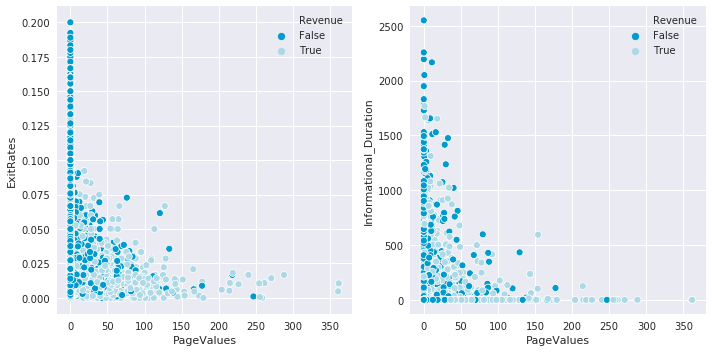

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(x='PageValues', y='ExitRates', hue = 'Revenue', data=df, palette=palette_list[0:2],ax=axes[0]);
sns.scatterplot(x='PageValues', y='Informational_Duration', hue = 'Revenue', data=df, palette=palette_list[0:2],ax=axes[1]);
fig.tight_layout()
plt.show()

When looking at the two example visualziations above, it can be seen that it is the outliers that are causing the skewness in the data. 

You can see specifically wih ExitRates in the first visualization, no revenue accrue with 0 value for PageValue. Because of this, esentially we know that there is a large amount of people that come onto the site, and choose to leave right away. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

In the second visualization, for 0 value PageValues there are no instances of Informational Duration. There are some instances of what apears to be in the low single digits of a higher Information Duration, but for the most part this seems to be the same as the first visualization. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

Rather than dropping these datapoints, we have determined to keep them in the data set to be used in our models because they directly effect the shape of the distribution which is relevant to how we standardize and normalize it.


----

# Handling Skewness

------------------------------------------------------

**PageValues_skew had positive skewness of 6.38**

**Transformation yielded skewness of 1.34**

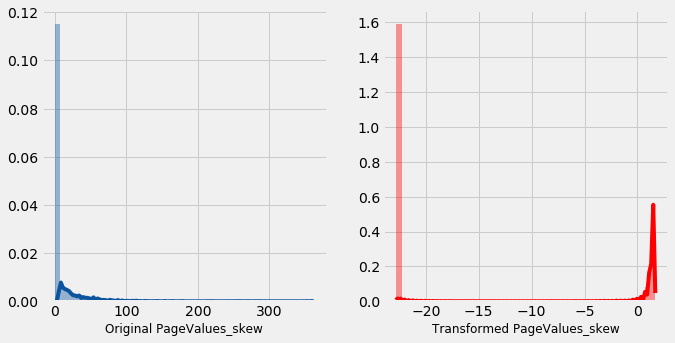

------------------------------------------------------

**Informational_Duration_skew had positive skewness of 7.58**

**Transformation yielded skewness of 1.54**

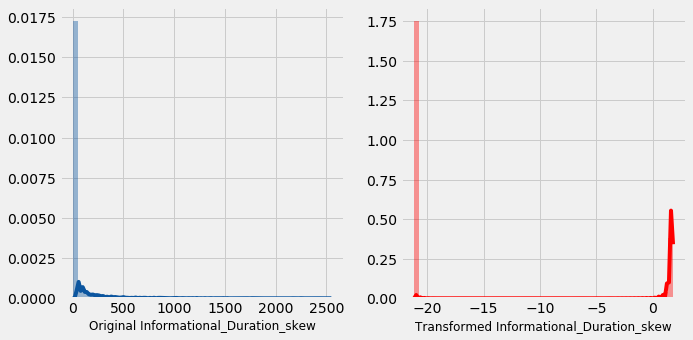

------------------------------------------------------

**average_informational_duration_skew had positive skewness of 11.22**

**Transformation yielded skewness of 1.54**

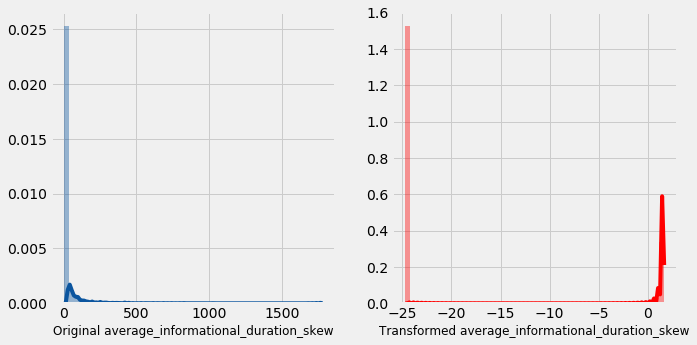

------------------------------------------------------

**average_administrative_duration_skew had positive skewness of 9.42**

**Transformation yielded skewness of -0.00**

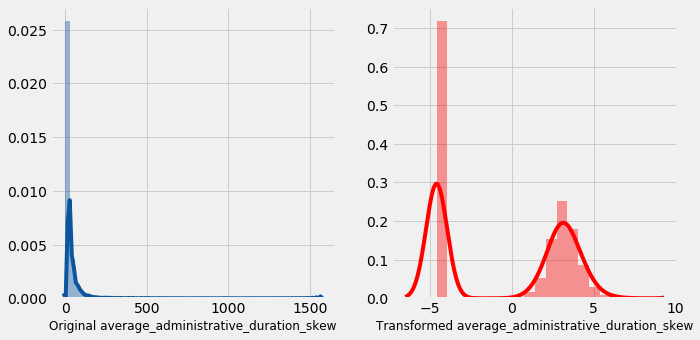

------------------------------------------------------

**average_ProductRelated_duration_skew had positive skewness of 10.30**

**Transformation yielded skewness of 0.21**

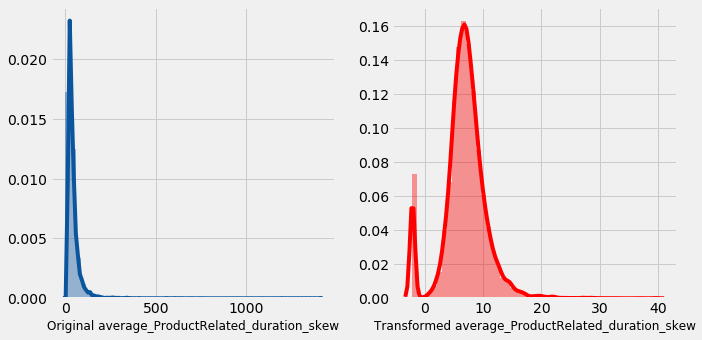

------------------------------------------------------

**average_BounceRates/ExitRates_skew had positive skewness of 2.66**

**Transformation yielded skewness of 0.11**

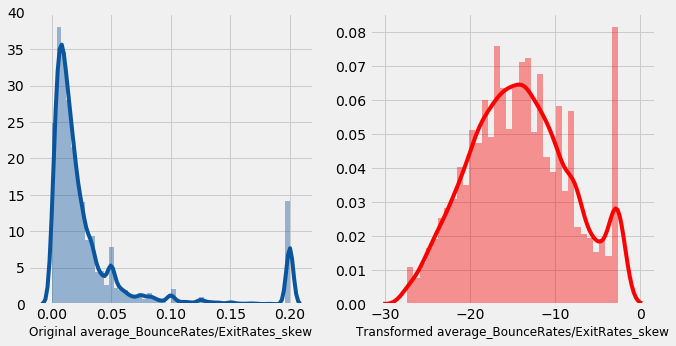

In [20]:
from skew_autotransform import skew_autotransform
from scaled_data import *
df= pd.read_csv("pre_online_shoppers_intention.csv")
skew_cols = [

    'PageValues',
   'Informational_Duration'  , 
    'average_informational_duration',
    'average_administrative_duration',
    'average_ProductRelated_duration', 
    'average_BounceRates/ExitRates'
            ]

 
for i  in skew_cols:

    df[i+'_skew'] = df[i]
    
    
cols_to_skew = [

    'PageValues_skew' ,
 
    'Informational_Duration_skew' ,
                
    'average_informational_duration_skew', 
    'average_administrative_duration_skew',
    'average_ProductRelated_duration_skew',
    'average_BounceRates/ExitRates_skew'
               
               
               
               ]

df = skew_autotransform(df,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)
plt.show()

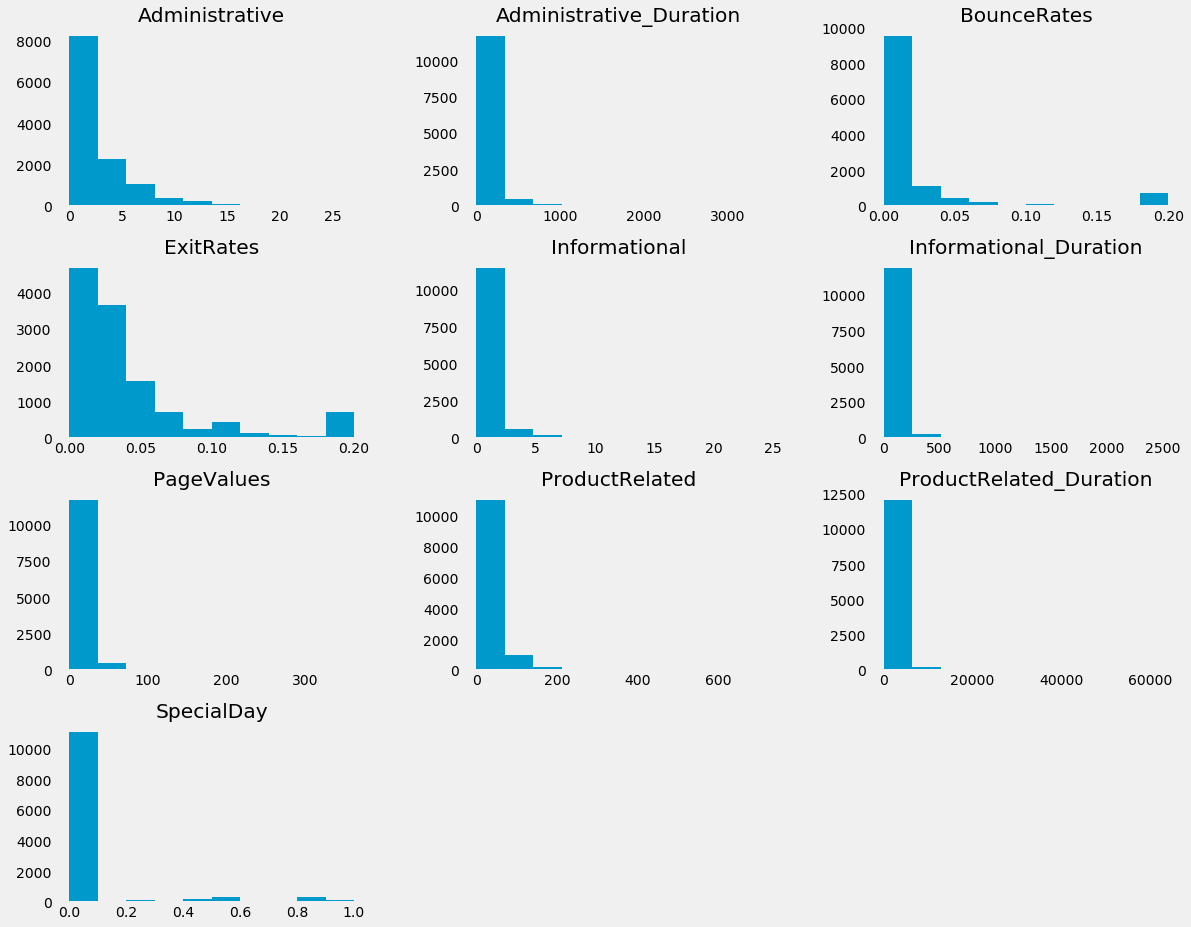

In [27]:
cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
   
 ]


df[cols].hist(figsize =(18,15),color=  palette_list[5],grid = False)
plt.show()

**As can be seen in the above visualizations, there was a tendency for a right skewness in most features prior to Transformation.** [__Ref Notebook__](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/DataPreprocessing.ipynb)

### Standardization

We then use MinMaxScaler to apply standardization to the data. [__Ref Notebook__](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/DataPreprocessing.ipynb)

## Spliting the Data to Features and Target
After going through the data preparation steps we made a [scaled_data.py](scaled_data.py) file to call a function named ```clean_data() ```  in every modeling notebook that split the data to features and target.


---

#  Pre-Process Before Modeling:

- Feature Selection
- Splitting into Testing & Training Data
- Pre-Modeling step of which and how many features to  select *using the SpFtSel package*
- Determine what features will be used for the cross-validation process



---
## Naive model



In [40]:
#https://github.com/fairfield-university-ba545/project1-mtb/blob/master/Pipeline%201-zscoreadditions.ipynb
# -----------------------------------------------------------------------------------
# Y Naive model -  assume all of the customers didn't buy, calculate % you are right (Y=0)
# -----------------------------------------------------------------------------------
display(Markdown("### Naive model:"))
display(Markdown("*The Naive model -  assume all of the customers didn't buy, calculate % you are right (Y=0)*"))

count_Y = df['Revenue'].value_counts()


# Calculate False values divided by the Y total observations
Y_False = round((count_Y[0]/df.index.shape[0])*100,2)

# show user what the % is that Y1 is True in the dataset
display(Markdown("**Revenue Model: If you assume all of the customers didn't buy, it would be right {}%  of the times.** ".format(Y_False )))
display(Markdown("---"))

### Naive model:

*The Naive model -  assume all of the customers didn't buy, calculate % you are right (Y=0)*

**Revenue Model: If you assume all of the customers didn't buy, it would be right 84.53%  of the times.** 

---

# Modeling Process

1. [Logistic Regression](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/InitialModels.ipynb)
2. [Naive Bayes](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/InitialModels.ipynb)
1. [Decision Tree Classified ](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/InitialModels.ipynb)
1. [Random Forest](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/RandomForest-EV-v3.ipynb)
1. [GradientBoostingClassifier ](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/GradientBoostingClassifier.ipynb)
1. [SVM ](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/SVM_model.ipynb) 
1. [Voting Classifier](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/VotingClassifier.ipynb)




Within all  models, we will run four variations of the these models using:

-  No hyperparameters 
-  With oversampling  and no hyperparameters 
- With oversampling and hyperparameters (using __GridSearchCV__) 
-  With oversampling ,hyperparameters and feature selection





# Model Performance:

|<br>| Model bias F1 score| F1 variance | Model bias AUC score | AUC variance| Ranking |
|---|:---:|:---:|:---:|:---:|:---:|
|Gradient Boosting Classifier |0.90644 | 0.00583| 0.90522|0.00548 |1 |
|Random Forest Classifier | 0.87402 |0.00753 |0.87496 |0.00677 |2 |
|Voting Classifier | 0.85257 |0.00798 |0.85691 |0.00706 |3 |
|Decision Tree Classifier |0.83962 | 0.00861 | 0.84664 |0.00740 |4 |
| SVM | 0.84158 |0.00851 |0.84760 |0.00739 |5 |
| Naive Bayes |0.83920  |0.00863 |0.84380 | 0.00736 |6 |
| Logistic Regression | 0.83832 |0.00813 |0.84162 |0.00726 |7 |


[<img src="docs/AlgorithmComparison_F1.png" width="900"/>](docs/AlgorithmComparison_F1.png)

__More info can be found on the [Models Evaluation notebook](https://github.com/aloukrezis01/online-shopping-analysis/blob/master/Models/Models_Evaluation_all.ipynb)__

# Final Model

Our Gradient Boosting Classifier Model performed the best out of the 7 models we tested. When paired with the following hyperparameters: <br>


```java 
GradientBoostingClassifier(learning_rate=0.05,
n_estimators=1250,max_depth=4, min_samples_split=10,min_samples_leaf=1, 
subsample=0.8 , random_state=123) ``` 
and these are the features that we picked to run on said model:
<br>



```python
best_features_GB = ['Browser_dummies_2', 'TrafficType_dummies_8', 'Region_dummies_2', 'season_dummies_Spring', 'OperatingSystems_dummies_2', 'Region_dummies_3', 'Weekend_binary', 'Region_dummies_1','TrafficType_dummies_2', 'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s','season_dummies_Fall', 'PageValues_skew_s']
 ```
 




__It generated a F1 score of .906 and bias of 0.0058. Utilizing KFold allowed GBC to pull ahead of other powerful models such as Random Forest and the Voting Classifier.__

---

## Recurring Important Features  in All of The Models:
|Variable | Rank |
|--|:--:|
| Page Values| 1 |
| Season: Fall | 2 |
| Average_BounceRates/ExitRates | 3 |
| Average_AdministrativeDuration | 4 |
| Average_ProductRelated | 5 |
| Average_InformationalDuration | 6 |
| VisitorType: New Visitor | 7 |
| Region 1 | 8 |
| Region 3 | 9 |
| Weekend | 10 |

---

# Recommendations

Given that our top performing predictive models showed value for the Fall season, time duration on the Administrative and Informational site pages, the day of the week being the weekend, in Regions 1 & 3, and being a new user, we felt the next strategic initiatives should be centered around those in order to drive more user engagement and to deliver a conversion to higher sales.

**Add Banner Ads and Pop-Up Promotions to Generate Conversions and Growth**
- Because the amount of time on both the Administrative and Informational pages of the site determine whether a user stays on the site or not, by implementing promotional coupons or links to special sales can incentivize 
- We can determine the amount of time we wait to display the ads based on an average time a user decides to exit a specific page, and do it a few seconds before

**Test Promotional Campaigns for Price Bundling & Reduced Pricing Initiatives** 
- Test campaigns will be initiated in fall to see which methods are most effective
- A/B testing in different markets, days of the week and months will help determine optimal effectiveness
- Once determining which method is most effective, we will implement fully across the platform for the Fall season, our highest grossing months

**Implement Initiatives Primarily in Regions 1 & 3**
- Most of the site’s views and missed revenue opportunities occur in both these regions
- By focusing our initiatives in these two regions, we have a larger opportunity of conversion of non purchasers to purchasers because we have a larger addressable market we can reach out to (more missed revenue opportunities in these months than total revenue opportunities in other months)

**Primarily Target New Users**
- If it is possible to determine the site visitor is a new user, we look to develop a standard method of promotion or advertising to increase the likelihood of purchasing on the site. 
- We found that there is much higher likelihood a new user will make a purchase versus an older user. Whatever the reason it may be a previous user is not willing to repurchase on our site, we felt given the current trends and the data we have been presented, it will be more effective to increase the likelihood of capturing the new user rather than spending time to re-engage an old user.


By focusing our strategy on these four initiatives, we believe we will create a higher change generating revenue opportunities and increase more effective site visits. These new incentives can even create potential for conversions of old users to recurring users.


---

# Potential Next Steps

Outside of our recommendation, we feel that with additional data we can run further tests of our predictive models, re-evaluate our results, and implement further initiatives to increase effectiveness for the site.

**Obtain specific product information from the site**
- By having more product specific and customer specific data such as product type, number of units purchased, other products purchased by same customer, unit price
- See if there are any customer types or product types that result in more sales than others, change marketing strategy to focus more on growth drivers

**Find trends of buyers’ purchasing power and products similarly purchased with one another**
- Use models to see which products will most likely result in that user buying another product such as someone buying baby powder is more likely to buy diapers, or someone buying chips is more likely to also buy salsa dip

**Create promotional ads recommending products the user may also like to purchase based on trend analysis**
- Similar to the previous point, if a user indicates they would like to purchase baby powder, a promotional ad advertising diapers may be effective
- Offering advertisements or special promotions for these complementary products can lead to higher revenue growth

**Re run initial models with new, more detailed data to see if there are any significant changes to results**
- Based on whatever our new results find when re-running each model we will determine what other new steps we can take which make the most sense


#### For hiding the code blocks we used this link https://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/?from=@